In [31]:
import pandas as pf
import numpy as nf
import re
import string
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
cali_codes = pf.read_csv('Cali_penal_codes.csv', encoding='ISO-8859-1')
nyc_codes = pf.read_csv('NYC_penal_codes.csv', encoding='ISO-8859-1')

In [33]:
def normalize_text(text):
    text = str(text)  #Converting any input to string
    text = text.lower()  #Converting to lowercase
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)  #Removing punctuation
    return text

In [34]:
print("California Penal Codes Columns:", cali_codes.columns)
print("New York Penal Codes Columns:", nyc_codes.columns)

California Penal Codes Columns: Index(['id', ' citation'], dtype='object')
New York Penal Codes Columns: Index(['id', ' citation'], dtype='object')


In [35]:
cali_codes['normalized_citation'] = cali_codes[' citation'].apply(normalize_text)
nyc_codes['normalized_citation'] = nyc_codes[' citation'].apply(normalize_text)

In [14]:
print("California Penal Codes - Preprocessed:")
print(cali_codes.head())
print("\nNew York Penal Codes - Preprocessed:")
print(nyc_codes.head())

California Penal Codes - Preprocessed:
                             id  \
0                            id   
1  Title 0 Article 0 Citation 0   
2  Title 0 Article 0 Citation 1   
3  Title 0 Article 0 Citation 2   
4  Title 0 Article 0 Citation 3   

                                            citation  \
0                                           citation   
1  a person is guilty of criminal solicitation in...   
2  a person is guilty of criminal solicitation in...   
3  a person is guilty of criminal solicitation in...   
4  a person is guilty of criminal solicitation in...   

                                 normalized_citation  
0                                           citation  
1  a person is guilty of criminal solicitation in...  
2  a person is guilty of criminal solicitation in...  
3  a person is guilty of criminal solicitation in...  
4  a person is guilty of criminal solicitation in...  

New York Penal Codes - Preprocessed:
                             id  \
0         

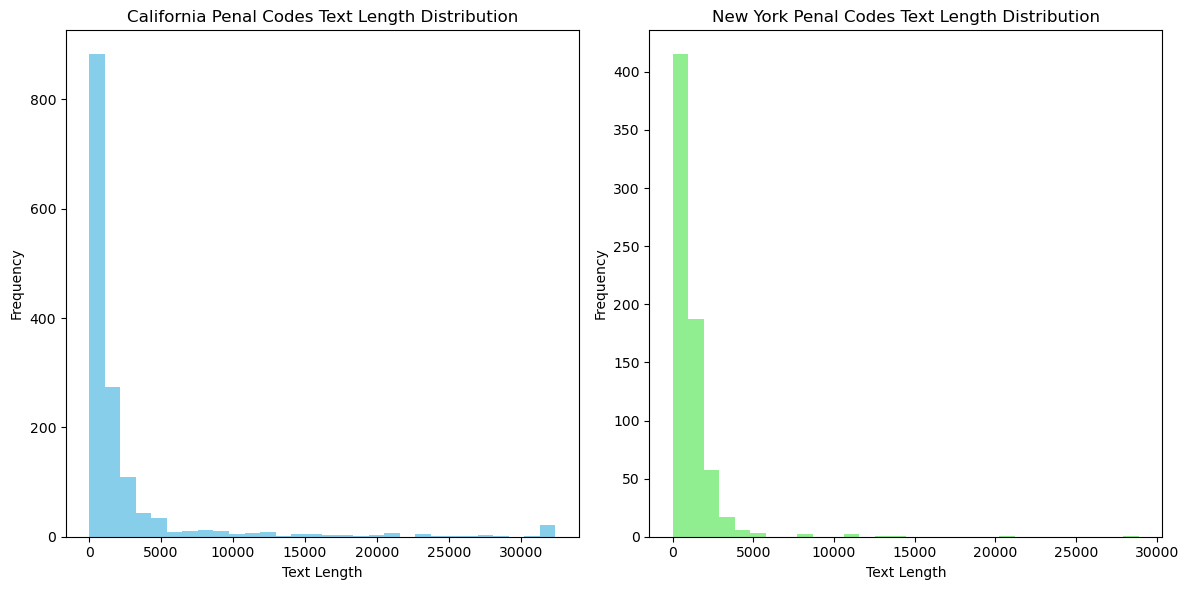

In [36]:
#Calculating the length of each preprocessed citation
cali_codes['text_length'] = cali_codes['normalized_citation'].apply(len)
nyc_codes['text_length'] = nyc_codes['normalized_citation'].apply(len)

#Plotting the distribution of text lengths
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(cali_codes['text_length'], bins=30, color='skyblue')
plt.title('California Penal Codes Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(nyc_codes['text_length'], bins=30, color='lightgreen')
plt.title('New York Penal Codes Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

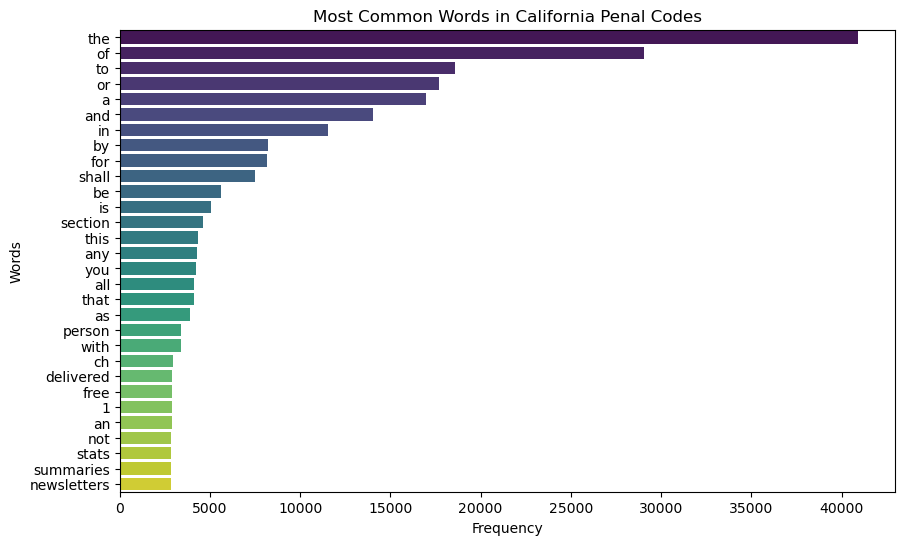

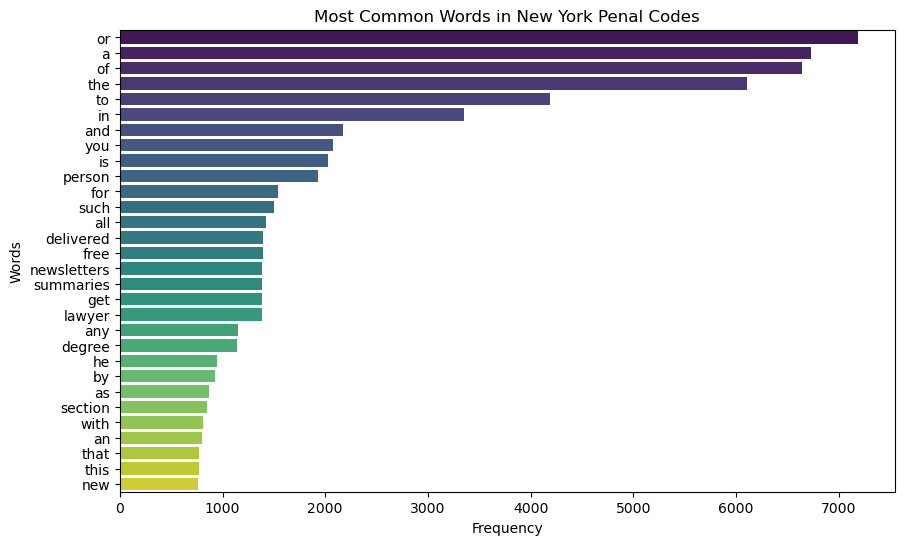

In [37]:
def plot_most_common_words(text_series, title, n_most_common=30):
    word_list = ' '.join(text_series).split()
    word_freq = Counter(word_list)

    common_words = word_freq.most_common(n_most_common)
    words = [word[0] for word in common_words]
    counts = [word[1] for word in common_words]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts, y=words, palette='viridis')
    plt.title(f'Most Common Words in {title}')
    plt.xlabel('Frequency')
    plt.ylabel('Words')

    
plot_most_common_words(cali_codes['normalized_citation'], 'California Penal Codes')
plot_most_common_words(nyc_codes['normalized_citation'], 'New York Penal Codes')

In [39]:
tfidf_vectorizer = TfidfVectorizer(max_features=500,  # Keeping up top 500 most important terms
                                   ngram_range=(1, 2),  #Considering both unigrams and bigrams
                                   stop_words='english')  #Removing English stop words


cali_tfidf = tfidf_vectorizer.fit_transform(cali_codes['normalized_citation'])
nyc_tfidf = tfidf_vectorizer.transform(nyc_codes['normalized_citation'])
print("Adjusted TF-IDF Features for California Penal Codes:", cali_tfidf.shape)
print("Adjusted TF-IDF Features for New York Penal Codes:", nyc_tfidf.shape)

Adjusted TF-IDF Features for California Penal Codes: (1473, 500)
Adjusted TF-IDF Features for New York Penal Codes: (693, 500)


In [40]:
print("Columns in California Penal Codes dataset:", cali_codes.columns)
print("Columns in New York Penal Codes dataset:", nyc_codes.columns)

Columns in California Penal Codes dataset: Index(['id', ' citation', 'normalized_citation', 'text_length'], dtype='object')
Columns in New York Penal Codes dataset: Index(['id', ' citation', 'normalized_citation', 'text_length'], dtype='object')
